<a href="https://colab.research.google.com/github/Igirisu861/SmartDataProcessing/blob/main/Assignment_2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="color:red;font-weight: bold;font-size:40px">Assignment 2 - Linear Regression</span>

You’ve just landed a contract with an Orlando-based eCommerce company specializing in online clothing sales. In addition to their digital storefront, they offer in-store style consultations, where customers meet with personal stylists to receive fashion advice. After their session, customers can conveniently place orders through the company’s mobile app or website.

Now, the company is at a crossroads—they need to determine whether to prioritize enhancing their mobile app experience or improving their website. That’s where you come in! They’ve brought you on board to help them make the right decision.

# Retrieving the data

a) Import pandas, numpy, matplotlib,and seaborn.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

b) Read the Ecommerce Customers CSV file and store it as a variable.

In [22]:
df = pd.read_csv('/content/Ecommerce Customers')

In [23]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


c) Display the first few rows of the customers dataset and review its info() and describe() methods.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [25]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory analysis

1- Use Seaborn to create a jointplot to visualize the relationship between Time on Website and Yearly Amount Spent. What are your thoughts on the correlation? (10 pts)

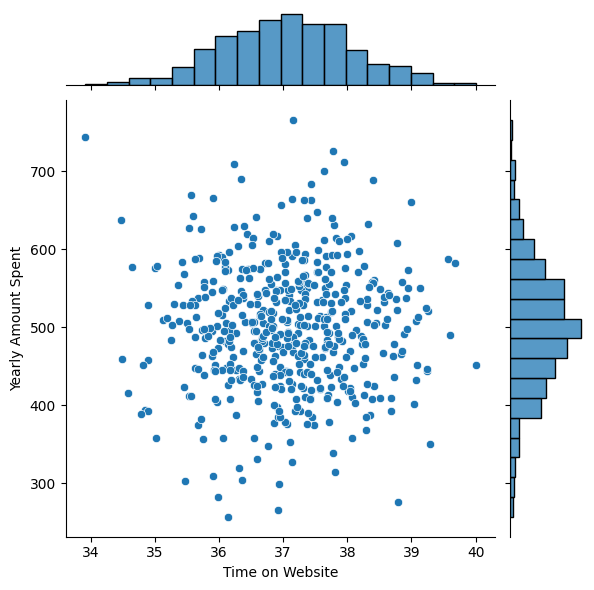

In [26]:
sns.jointplot(x='Time on Website', y = 'Yearly Amount Spent', data= df)

In [27]:
#Oh Shoot, its barely correlated

2- Repeat the analysis using the Time on App column instead. What are your thoughts on the correlation? (10 pts)

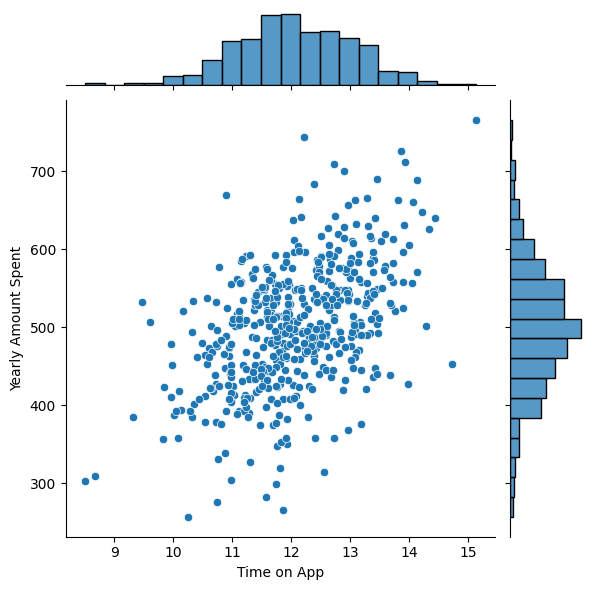

In [28]:
sns.jointplot(x='Time on App', y = 'Yearly Amount Spent', data= df)

In [29]:
#Wow, this one is more correlated than the last one, you can kinda see a regression Line

3- Use Seaborn's jointplot to create a 2D hexbin plot comparing Time on App and Length of Membership. (10 pts)

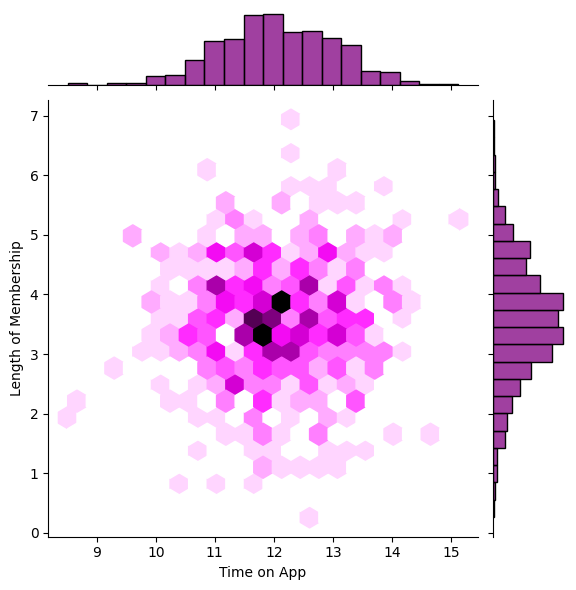

In [30]:
sns.jointplot(x='Time on App', y = 'Length of Membership', data= df, kind= 'hex', color='purple')

4- Let's explore these relationships across the entire dataset using Seaborn's pairplot. (10 pts)

Based on this plot, which feature appears to have the strongest correlation with Yearly Amount Spent?

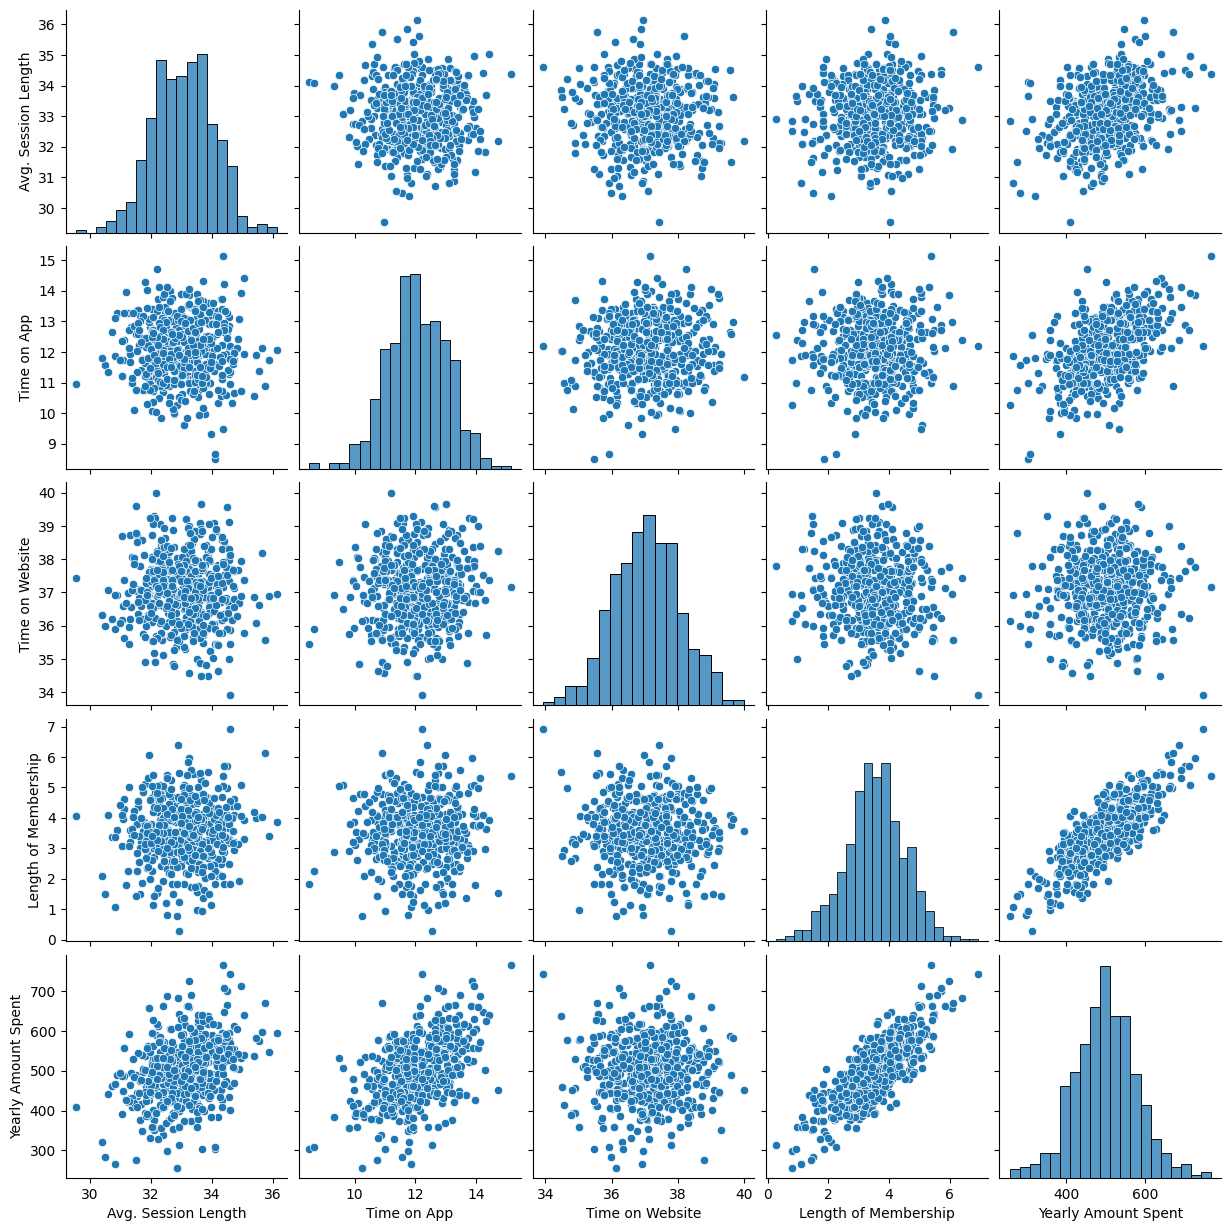

In [31]:
sns.pairplot(df)

In [32]:
#Here you can see that the most related is length of membership and yearly amount spent

5- Use Seaborn's lmplot to create a linear model plot comparing Yearly Amount Spent and Length of Membership. (10 pts)

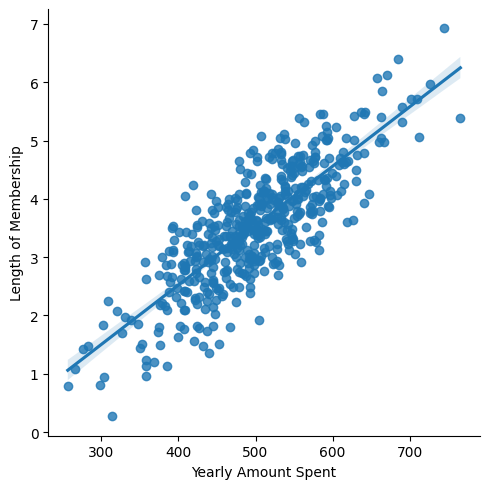

In [33]:
sns.lmplot(x= 'Yearly Amount Spent', y = 'Length of Membership', data = df)

# Training and testing the model

6- Assign the numerical features of the customers dataset to a variable X, and set y equal to the Yearly Amount Spent column.

In [34]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [35]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [36]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [37]:
y = df['Yearly Amount Spent']

7- Split the data into training and testing sets using test_size=0.3 and random_state=101 to ensure reproducibility.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

8- Create an instance of a Linear Regression model and train (fit) it using the training data.

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

9- Create a DataFrame to display the model's coefficients. (10 pts)

Index: Names of the numerical features.


Column: 'Coefficient' (containing the corresponding coefficient values).


Print the DataFrame to view the results.

In [42]:
pd.DataFrame(data=lm.coef_,index=X.columns,columns=['Coefficient'])

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


# Predictions

10- Use the trained model to make predictions on the test data.

In [43]:
pred = lm.predict(X_test)

In [44]:
pred

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

11- Use Matplotlib to create a scatter plot comparing the actual test values with the predicted values. (10 pts)

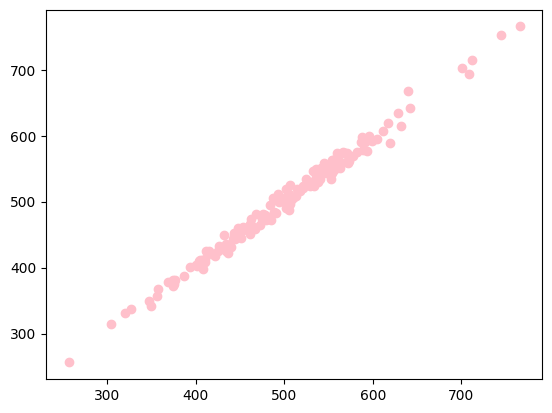

In [45]:
plt.scatter(y_test, pred, color = 'pink')

# Evaluating the model

12- Calculate and print the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). (10 pts)

In [46]:
from sklearn import metrics


In [47]:
metrics.mean_absolute_error(y_test, pred)

7.228148653430826

In [48]:
metrics.mean_squared_error(y_test, pred)

79.81305165097427

In [49]:
np.sqrt(metrics.mean_squared_error(y_test, pred))

8.933815066978624

13- Use Seaborn to plot a histogram of the residuals and overlay a normal distribution curve to assess normality. (10 pts)

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

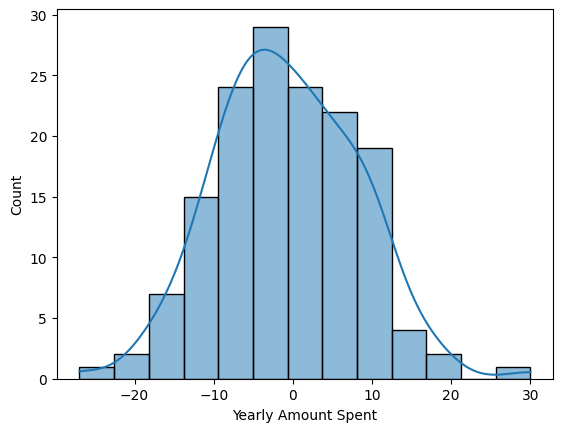

In [50]:
sns.histplot((y_test-pred),kde=True)

# Conclusions

14- Print the DataFrame of the model's coefficients once more. (10 pts)

How would you interpret these coefficients?

Based on the analysis, do you think the company should prioritize improving their mobile app or their website?

In [51]:
pd.DataFrame(data=lm.coef_,index=X.columns,columns=['Coefficient'])

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [52]:
metrics.r2_score(y_test, pred)

0.9890046246741234

Time on app has much more impact in the yearly spent so it is more convenient and profitable to focus on the app. Also, our model is very cool and has 98% accuracy.